# Using word2vec to Semantically Plot Self-Improvement

   There are a lot of good guides and tools for exploring word2vec, I'd recommend taking a look at all of them
   :
   
   https://github.com/dominiek/word2vec-explorer
   
   https://gist.github.com/aneesha/da9216fb8d84245f7af6edaa14f4efa9#file-display_closestwords_tsnescatterplot-ipynb
   
   https://medium.com/explore-artificial-intelligence/word2vec-a-baby-step-in-deep-learning-but-a-giant-leap-towards-natural-language-processing-40fe4e8602ba
   
   https://github.com/pg2455/U.S-Presidential-Speeches
   
   https://matplotlib.org/index.html
   
   
   

In [1]:
import os
import gensim
import random
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

In [2]:
# If you haven't downloaded word2vec embeddings, you should do so here
# load pre-trained word2vec embeddings
# The embeddings can be downloaded from command prompt:
# !wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"


In [61]:
# load pre-trained word2vec embeddings
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [62]:
# Let's just see what this looks like
model.similar_by_word('computer')

[('computers', 0.7979379892349243),
 ('laptop', 0.6640493273735046),
 ('laptop_computer', 0.6548868417739868),
 ('Computer', 0.6473334431648254),
 ('com_puter', 0.6082079410552979),
 ('technician_Leonard_Luchko', 0.5662748217582703),
 ('mainframes_minicomputers', 0.5617721080780029),
 ('laptop_computers', 0.5585449934005737),
 ('PC', 0.5539618134498596),
 ('maker_Dell_DELL.O', 0.5519254207611084)]

In [5]:
# This function uses TSNE to reduce all the demensions of a vector down to 2 
# so we can plot it on a graph
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()


<IPython.core.display.Javascript object>


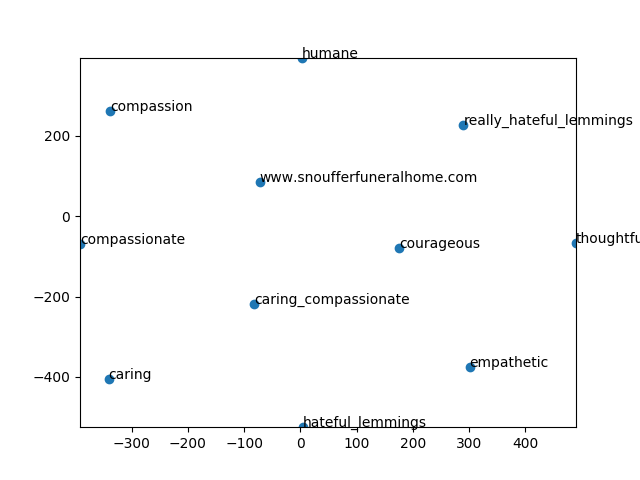

In [6]:
display_closestwords_tsnescatterplot(model, 'compassionate')

In [7]:
# This function uses TSNE to reduce all the demensions of a vector down to 3 
# so we can plot it on a 3D graph
def display_closestwords_tsnescatterplot3d(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 3 dimensions
    tsne = TSNE(n_components=3, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    z_coords = Y[:, 2]
    # display scatter plot

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    c = ['b', 'r', 'g', 'y']
    for label, xs, ys, zs in zip(word_labels, x_coords, y_coords, z_coords):
        ax.scatter(xs, ys, zs, c=random.choice(c))
        ax.text(xs, ys, zs, label)
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

<IPython.core.display.Javascript object>


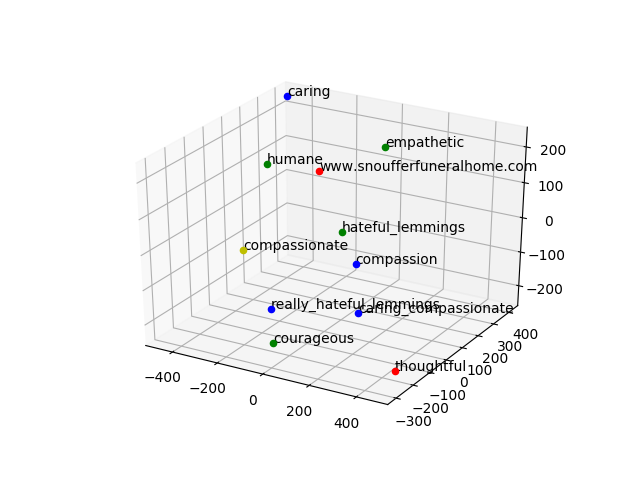

In [8]:
display_closestwords_tsnescatterplot3d(model, "compassionate")

In [9]:
model.most_similar(positive= 'sugar', topn= 6)

[('refined_sugar', 0.7480024099349976),
 ('cane_sugar', 0.63625168800354),
 ('turbinado', 0.6269999742507935),
 ('Sugar', 0.6100630760192871),
 ('cocoa', 0.6048755645751953),
 ('Refined_sugar', 0.6003995537757874)]

# Plotting the Path

In [149]:
# Vector Path gives us an array of words that are on a semantic path
# from word1 to word2

#NOTE: THIS ONE ISN'T SO GREAT AND IS A LITTLE SIMPLISTIC

def vector_path(model, word1, word2):
    direction = model[word2] - model[word1]
    max_stops = 10
    breadcrumbs = [word1]
    similarity = model.similarity(word1,word2)

    for i in range(max_stops):
        print("Current Simlilarity is: ", similarity)
        if i == 0:
            lastword = word1
        else:
            lastword = breadcrumbs[i-1]
        #slowly steps the search closer to word2
        d = direction*((i+1)/max_stops)
        #print(d)
        nextwords = model.similar_by_vector(model[lastword]+d)
        #print(model.most_similar(d))
        #print(nextwords)
        X = ''
        just_words, scores = zip(*nextwords)
        if word2 in just_words:
            X = word2
            breadcrumbs.append(X)
            print('Found!')
            similarity = model.similarity(X,word2)
            print(similarity)
            break
        else:
            X = model.most_similar_to_given(word2, just_words)
        breadcrumbs.append(X)
        similarity = model.similarity(X,word2)
        #update direction
        direction = model[word2] - model[X]
    #print(breadcrumbs)
    return breadcrumbs
    #closest = sorted_by_similarity(words, direction)[:10]

In [150]:
print(vector_path(model, 'hungry', 'pizza'))

Current Simlilarity is:  0.22557361098784393
Current Simlilarity is:  0.29902226848197044
Current Simlilarity is:  0.25124782980779126
Found!
1.0
['hungry', 'famished', 'ravenous', 'pizza']


## Plot the Semantic Path

In [12]:
# Similar to our closest word functions above, this plots the words we found
# to be on a path and relates them with arrows, or the quiver function
def printVectorPath(model, worda, wordb):
    wordarray = vector_path(model, worda, wordb)
    print(wordarray)
    arr = np.empty((0,300), dtype='f')
    # add the vector for each of the closest words to the array
    for word in wordarray:
        arr = np.append(arr, np.array([model[word]]), axis=0)
        
    # find tsne coords for 3 dimensions
    tsne = TSNE(n_components=3, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    z_coords = Y[:, 2]
    # display scatter plot

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    c = ['b', 'r', 'g']
    for label, xs, ys, zs in zip(wordarray, x_coords, y_coords, z_coords):
        ax.scatter(xs, ys, zs, c=random.choice(c))
        ax.text(xs, ys, zs, label)
        # plots our arrows between the previous word and the current word
        if label!= wordarray[0]:
            ax.quiver(U, V, W, xs, ys, zs)
        U,V,W = xs, ys, zs
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

Current Simlilarity is:  0.13030140407561114
Current Simlilarity is:  0.3032835294826304
Current Simlilarity is:  0.25895327343663926
Found!
1.0
['understanding', 'understood', 'empathy', 'remorseful']


<IPython.core.display.Javascript object>


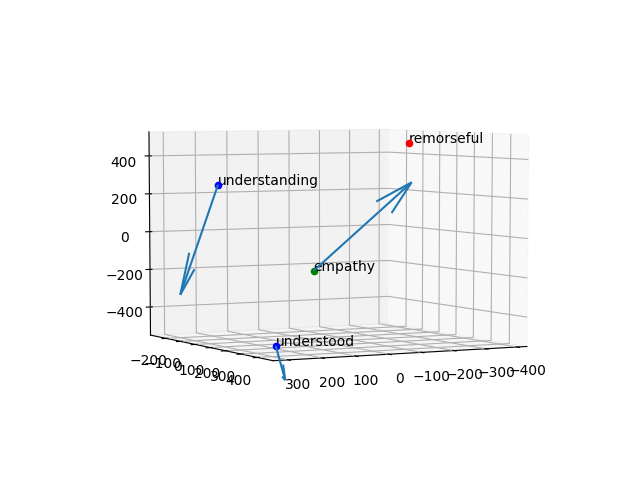

In [151]:
printVectorPath(model, 'understanding', 'remorseful')

## Your Top Current Adjectives

In [14]:
adjective1 = 'friendly'
adjective2 = 'funny'
adjective3 = 'intelligent'
current_adj = [adjective1, adjective2, adjective3]

## Your Goal Adjectives

In [15]:
adjective4 = 'innovative'
adjective5 = 'entertaining'
adjective6 = 'compassionate'
goal_adj = [adjective4, adjective5, adjective6]

## Compute Closest Aligned

In [152]:
tuples = []
for worda in current_adj:
    distance = 0.0
    closest = model.most_similar_to_given(worda, goal_adj)
    tuples.append([worda, closest])
print(tuples)


[['friendly', 'entertaining'], ['funny', 'entertaining'], ['intelligent', 'compassionate']]


In [ ]:
adjective1,adjective4 = tuples[0]
adjective2,adjective5 = tuples[1]
adjective3,adjective6 = tuples[2]

In [153]:
#Or you can assign them yourself if you're not satisfied with the above sorter
adjective1,adjective4 = ('friendly', 'compassionate')
adjective2,adjective5 = ('funny', 'entertaining')
adjective3,adjective6 = ('intelligent', 'innovative')


## Your Plots

Current Simlilarity is:  0.32748788272407076
Current Simlilarity is:  0.39389328774891424
Current Simlilarity is:  0.3677032720984274
Current Simlilarity is:  0.39389328774891424
Found!
1.0
['friendly', 'congenial', 'detecting_gastrointestinal_disorders', 'congenial', 'compassionate']


<IPython.core.display.Javascript object>


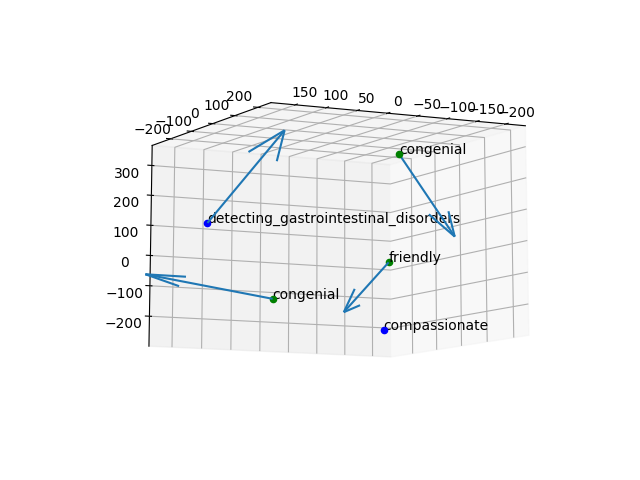

In [154]:
printVectorPath(model, adjective1, adjective4)

funny
hilarious
amusing
amusing
amusing
amusing
amusing
amusing
amusing
funny
hilarious
hilarious
hilarious
hilarious
hilarious
hilarious
hilarious
hilarious
hilarious
amusing
Found!
['funny', 'amusing', 'hilarious', 'entertaining']


<IPython.core.display.Javascript object>


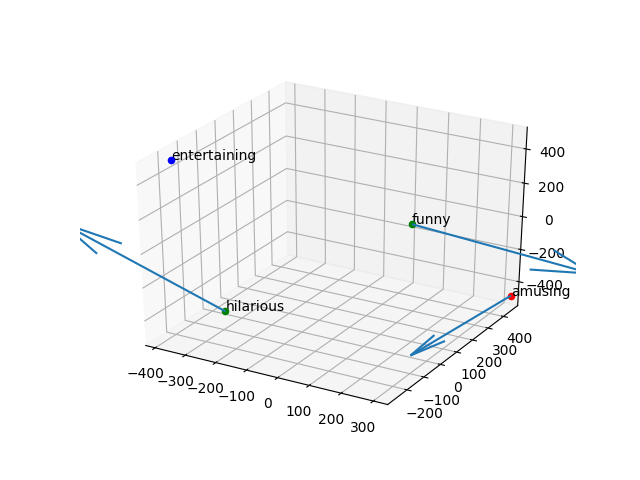

In [110]:
printVectorPath(model, adjective2, adjective5)

intelligent
intelligent
intelligent
intuitive
intuitive
intuitive
intuitive
intuitive
intuitive
intelligent
intelligent
intelligent
intelligent
Telkonet_SmartEnergy_TSE
Telkonet_SmartEnergy_TSE
Telkonet_SmartEnergy_TSE
Telkonet_SmartEnergy_TSE
Telkonet_SmartEnergy_TSE
Telkonet_SmartEnergy_TSE
intuitive
user_friendly
user_friendly
user_friendly
user_friendly
user_friendly
user_friendly
user_friendly
user_friendly
Telkonet_SmartEnergy_TSE
Found!
['intelligent', 'intuitive', 'Telkonet_SmartEnergy_TSE', 'user_friendly', 'innovative']


<IPython.core.display.Javascript object>


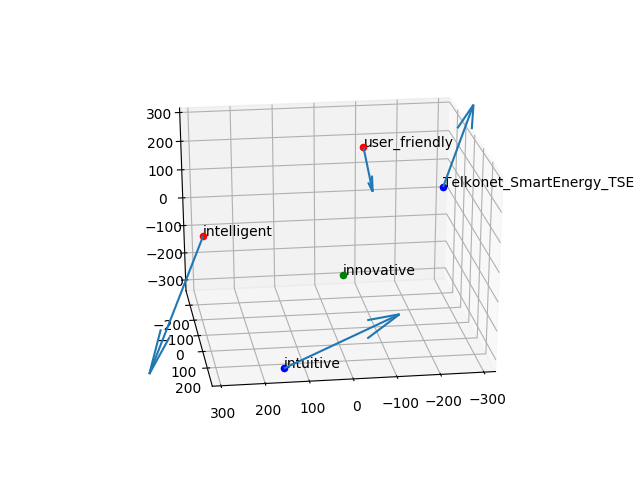

In [111]:
printVectorPath(model, adjective3, adjective6)